![Astrofisica Computacional](../logo.PNG)

---
## Shadow of a Kerr Black Hole

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

In this notebook we visualize the shadow of a Kerr black hole.


---

In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Metric Tensor

\begin{equation}
g_{\mu \nu} = \left[
\begin{matrix}
-\left(1 - \frac{2Mr}{\Sigma} \right) & 0 & 0 & -\frac{2aMr\sin^2 \theta}{\Sigma}\\ 
0 & \frac{\Sigma}{\Delta} 0 & 0 &\\
0 & 0 & \Sigma & 0\\
-\frac{2aMr\sin^2 \theta}{\Sigma} & 0 & 0 & \left( r^2 + a^2 + \frac{2a^2Mr \sin^2 \theta}{\Sigma} \right) \sin^2 \theta  
\end{matrix} 
\right]
\end{equation}

\begin{align}
\Delta = &r^2 - 2Mr + a^2\\
\Sigma = &r^2 + a^2 \cos^2 \theta
\end{align}

In [2]:
def lmbda(r, a):
    '''
    lambda Parameter
    '''
    numer = M*(r**2 - a**2) - r*(r**2 - 2*M*r + a**2)
    denom = a*(r - M)
    return numer/denom

def q2(r, a):
    numer = r**3*(4*M*a**2 - r*(r-3*M)**2)
    denom = a**2*(r - M)**2
    return numer/denom

In [3]:
def alpha(r, a, iota):
    return lmbda(r,a)/np.sin(iota)

def beta(r, a, iota):
    return np.sqrt(q2(r,a) - (lmbda(r,a)*np.cos(iota)/np.sin(iota))**2 + (a*np.cos(iota))**2 )

In [4]:
def plot(a, iota):
    rr = np.linspace(1.5,50,150000)
    X = alpha(rr, a, iota)
    Y = beta(rr, a, iota)
    
    BH = plt.Circle((0, 0), EH, color='k')
    
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.plot(X,Y, color='crimson')
    ax.plot(X,-Y, color='crimson')
    ax.add_patch(BH)

    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$\beta$')
    ax.grid(alpha=0.2)
    ax.axvline(0, c='k', alpha=0.1)
    ax.axhline(0, c='k', alpha=0.1)
    plt.title(f'Shadow of a Kerr black hole with a={a:.1f}')
    plt.show()

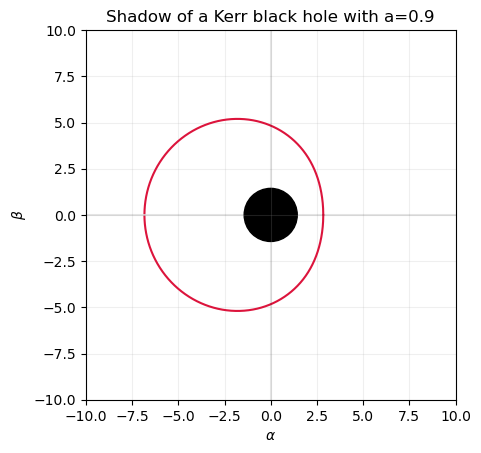

In [12]:
M = 1
a = 0.9
iota =np.pi/2

EH = M + np.sqrt(M**2 - a**2)

plot(a=a, iota=iota)

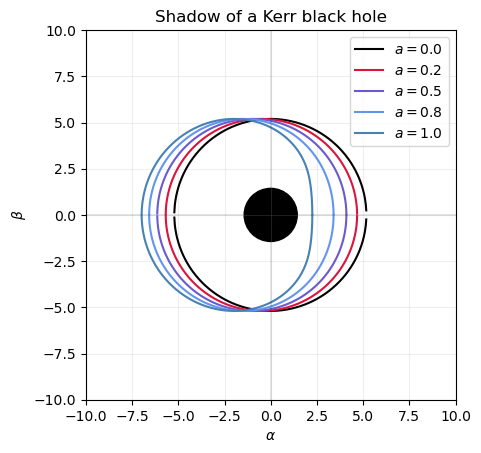

In [13]:
M = 1
aa = [0.01, 0.25, 0.5, 0.75, 0.99]
color = ['black', 'crimson', 'slateblue', 'cornflowerblue', 'steelblue', 'lightseagreen']
iota = np.pi/2


rr = np.linspace(0.9,50,900000)
BH = plt.Circle((0, 0), EH, color='k')
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

for i in range(len(aa)):
    X = alpha(rr, aa[i], iota)
    Y = beta(rr, aa[i], iota)
    ax.plot(X,Y, color=color[i], label=f'$a = ${aa[i]:.1f}')
    ax.plot(X,-Y, color=color[i])

ax.add_patch(BH)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.grid(alpha=0.2)
ax.axvline(0, c='k', alpha=0.1)
ax.axhline(0, c='k', alpha=0.1)
plt.title(f'Shadow of a Kerr black hole')
plt.legend()
plt.show()

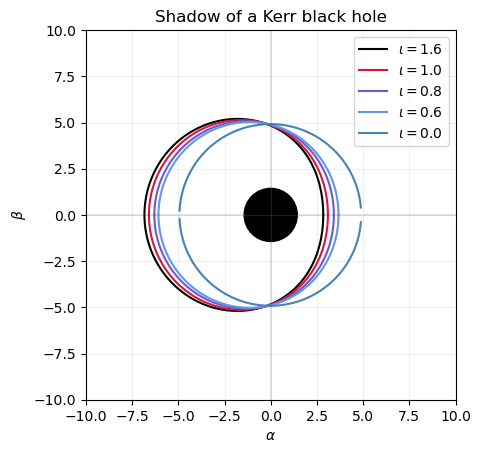

In [14]:
M = 1
a = 0.9
ii = [np.pi/2, np.pi/3, np.pi/4, np.pi/5, 0.01]
color = ['black', 'crimson', 'slateblue', 'cornflowerblue', 'steelblue', 'lightseagreen']

rr = np.linspace(0.9,50,900000)
BH = plt.Circle((0, 0), EH, color='k')
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

for i in range(len(ii)):
    X = alpha(rr, a, ii[i])
    Y = beta(rr, a, ii[i])
    ax.plot(X,Y, color=color[i], label=f'$\iota = ${ii[i]:.1f}')
    ax.plot(X,-Y, color=color[i])

ax.add_patch(BH)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.grid(alpha=0.2)
ax.axvline(0, c='k', alpha=0.1)
ax.axhline(0, c='k', alpha=0.1)
plt.title(f'Shadow of a Kerr black hole')
plt.legend()
plt.show()